In [1]:
# Importing the necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Reading the dat file

rating_dataset = pd.read_csv("ratings.dat", sep = "::",names=['UserID', 'MovieID', 'Rating', 'Timestamp'], engine='python')

In [3]:
rating_dataset.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
movie_dataset = pd.read_csv("movies.dat", sep = "::",names=['MovieID', 'Title', 'Genre'], engine='python')

In [5]:
movie_dataset.head()

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
user_dataset = pd.read_csv("users.dat", sep = "::",names=['UserID', 'Gender', 'Age','Occupation', 'Zip_code'], engine='python')

In [7]:
user_dataset.head()

,UserID,Gender,Age,Occupation,Zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
# Merging the dataset

master_data = pd.merge(rating_dataset,movie_dataset, on='MovieID')

In [9]:
master_data = pd.merge(master_data, user_dataset, on='UserID')

In [10]:
master_data.head()

,UserID,MovieID,Rating,Timestamp,Title,Genre,Gender,Age,Occupation,Zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [11]:
master_data.shape

(1000209, 10)

In [12]:
master_data.nunique()

UserID          6040
MovieID         3706
Rating             5
Timestamp     458455
Title           3706
Genre            301
Gender             2
Age                7
Occupation        21
Zip_code        3439
dtype: int64

In [13]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   Timestamp   1000209 non-null  int64 
 4   Title       1000209 non-null  object
 5   Genre       1000209 non-null  object
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zip_code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [14]:
master_data['Occupation'] = master_data['Occupation'].astype('str')

In [15]:
master_data['Occupation'].dtype

dtype('O')

In [16]:
master_data.isnull().sum()

UserID        0
MovieID       0
Rating        0
Timestamp     0
Title         0
Genre         0
Gender        0
Age           0
Occupation    0
Zip_code      0
dtype: int64

In [17]:
master_data['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

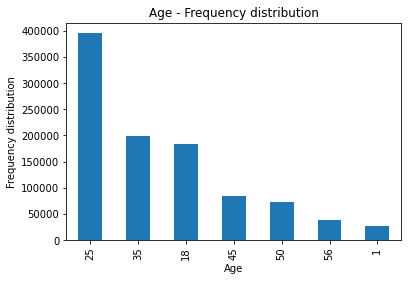

In [18]:
master_data['Age'].value_counts().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Frequency distribution')
plt.title('Age - Frequency distribution')
plt.show()

In [19]:
toystory_ratings = master_data[master_data.Title == 'Toy Story (1995)']
toystory_ratings

,UserID,MovieID,Rating,Timestamp,Title,Genre,Gender,Age,Occupation,Zip_code
40,1,1,5,978824268,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067
634,18,1,4,978154768,Toy Story (1995),Animation|Children's|Comedy,F,18,3,95825
938,19,1,5,978555994,Toy Story (1995),Animation|Children's|Comedy,M,1,10,48073
1323,28,1,3,978985309,Toy Story (1995),Animation|Children's|Comedy,F,25,1,14607
2118,44,1,5,978019369,Toy Story (1995),Animation|Children's|Comedy,M,45,17,98052
...,...,...,...,...,...,...,...,...,...,...
986597,761,1,4,975451381,Toy Story (1995),Animation|Children's|Comedy,M,18,7,99945
986617,1672,1,4,974709664,Toy Story (1995),Animation|Children's|Comedy,M,25,17,93933
986656,4242,1,4,965312337,Toy Story (1995),Animation|Children's|Comedy,M,50,7,78704
986787,4925,1,5,962663249,Toy Story (1995),Animation|Children's|Comedy,F,35,6,55401


In [20]:
toystory_ratings.groupby(['Title', 'Rating']).size()

Title             Rating
Toy Story (1995)  1          16
                  2          61
                  3         345
                  4         835
                  5         820
dtype: int64

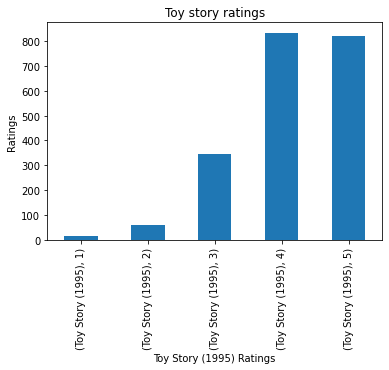

In [21]:
toystory_ratings.groupby(['Title', 'Rating']).size().plot(kind = 'bar')
plt.xlabel("Toy Story (1995) Ratings")
plt.ylabel("Ratings")
plt.title("Toy story ratings")
plt.xticks(rotation=90)
plt.show()

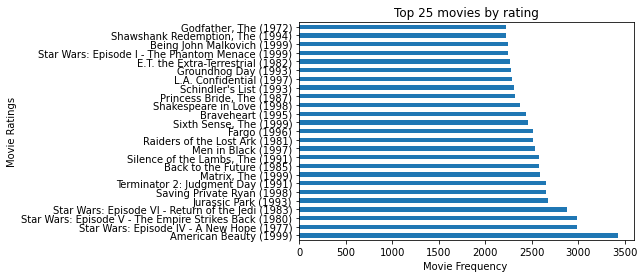

In [22]:
top25 = master_data.groupby('Title').size().sort_values(ascending=False)[0:25]
top25.plot(kind='barh')
plt.xlabel("Movie Frequency ")
plt.ylabel("Movie Ratings")
plt.title("Top 25 movies by rating")
plt.show()

In [23]:
print(top25)

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [24]:
user_2696 = master_data[master_data["UserID"] == 2696]

In [25]:
user_2696

,UserID,MovieID,Rating,Timestamp,Title,Genre,Gender,Age,Occupation,Zip_code
953847,2696,1270,2,973308676,Back to the Future (1985),Comedy|Sci-Fi,M,25,7,24210
953848,2696,1097,3,973308690,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,M,25,7,24210
953849,2696,1617,4,973308842,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,M,25,7,24210
953850,2696,800,5,973308842,Lone Star (1996),Drama|Mystery,M,25,7,24210
953851,2696,3386,1,973308842,JFK (1991),Drama|Mystery,M,25,7,24210
953852,2696,3176,4,973308865,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller,M,25,7,24210
953853,2696,1711,4,973308904,Midnight in the Garden of Good and Evil (1997),Comedy|Crime|Drama|Mystery,M,25,7,24210
953854,2696,1589,3,973308865,Cop Land (1997),Crime|Drama|Mystery,M,25,7,24210
953855,2696,1783,4,973308865,Palmetto (1998),Film-Noir|Mystery|Thriller,M,25,7,24210
953856,2696,1892,4,973308904,"Perfect Murder, A (1998)",Mystery|Thriller,M,25,7,24210


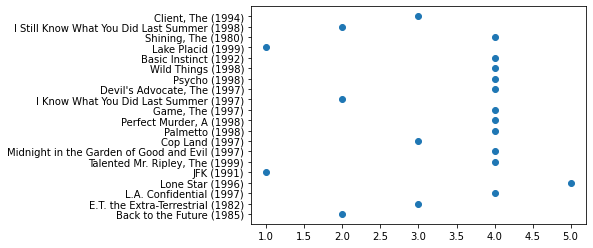

In [26]:
plt.scatter(user_2696.Rating, user_2696.Title)
plt.show()


In [27]:
master_data['Genre']

0                                 Drama
1          Animation|Children's|Musical
2                       Musical|Romance
3                                 Drama
4           Animation|Children's|Comedy
                       ...             
1000204                           Drama
1000205                         Western
1000206                          Horror
1000207                      Action|War
1000208         Adventure|Drama|Romance
Name: Genre, Length: 1000209, dtype: object

In [28]:
list_genre = master_data['Genre'].str.split('|')

In [29]:
list_genre.values

array([list(['Drama']), list(['Animation', "Children's", 'Musical']),
       list(['Musical', 'Romance']), ..., list(['Horror']),
       list(['Action', 'War']), list(['Adventure', 'Drama', 'Romance'])],
      dtype=object)

In [30]:
# Find out all the unique genres

listGenres = set()
for genre in list_genre:
    listGenres = listGenres.union(set(genre))

In [31]:
#type(listGenres)
print(listGenres)

{'Musical', "Children's", 'Horror', 'Thriller', 'Crime', 'Animation', 'War', 'Sci-Fi', 'Western', 'Action', 'Fantasy', 'Film-Noir', 'Documentary', 'Comedy', 'Mystery', 'Adventure', 'Romance', 'Drama'}


In [32]:
# Create a separate column for each genre category with a one-hot encoding ( 1 and 0) 
#whether or not the movie belongs to that genre. 

rating_onehotencoding = master_data['Genre'].str.get_dummies(sep='|')

In [33]:
rating_onehotencoding.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
master_data.head()

,UserID,MovieID,Rating,Timestamp,Title,Genre,Gender,Age,Occupation,Zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [44]:
df_final = pd.get_dummies(master_data['Gender'])

In [45]:
print(df_final)

         F  M
0        1  0
1        1  0
2        1  0
3        1  0
4        1  0
...     .. ..
1000204  0  1
1000205  0  1
1000206  0  1
1000207  0  1
1000208  0  1

[1000209 rows x 2 columns]


In [46]:
df_final2 = pd.concat((master_data, df_final), axis=1)

In [47]:
df_final2 = df_final2.drop(['Gender'], axis=1)

In [48]:
df_final2 = df_final2.drop(['M'], axis=1)

In [49]:
df_final2.head(2)

,UserID,MovieID,Rating,Timestamp,Title,Genre,Age,Occupation,Zip_code,F
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,1,10,48067,1
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,1,10,48067,1


In [50]:
master_data.head()

,UserID,MovieID,Rating,Timestamp,Title,Genre,Gender,Age,Occupation,Zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [51]:
# Encoding female as 1 and male as 0
df_final2 = df_final2.rename(columns={'F':'Gender'})
df_final2.head()

,UserID,MovieID,Rating,Timestamp,Title,Genre,Age,Occupation,Zip_code,Gender
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,1,10,48067,1
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,1,10,48067,1
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,1,10,48067,1
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,1,10,48067,1
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,1,10,48067,1


In [52]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   Timestamp   1000209 non-null  int64 
 4   Title       1000209 non-null  object
 5   Genre       1000209 non-null  object
 6   Age         1000209 non-null  int64 
 7   Occupation  1000209 non-null  object
 8   Zip_code    1000209 non-null  object
 9   Gender      1000209 non-null  uint8 
dtypes: int64(5), object(4), uint8(1)
memory usage: 77.3+ MB


In [53]:
df_final2['Gender'] = df_final2['Gender'].astype('str')

In [63]:
df_final2['Rating'] = df_final2['Rating'].astype('int')

In [64]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int32 
 3   Timestamp   1000209 non-null  int64 
 4   Title       1000209 non-null  object
 5   Genre       1000209 non-null  object
 6   Age         1000209 non-null  int64 
 7   Occupation  1000209 non-null  object
 8   Zip_code    1000209 non-null  object
 9   Gender      1000209 non-null  object
dtypes: int32(1), int64(4), object(5)
memory usage: 80.1+ MB


In [77]:
# Develop appropriate model to predict the ratings

X_feature = df_final2[['Age','Gender','Occupation']].values

In [78]:
X_feature

array([[1, '1', '10'],
       [1, '1', '10'],
       [1, '1', '10'],
       ...,
       [45, '0', '5'],
       [45, '0', '5'],
       [45, '0', '5']], dtype=object)

In [79]:
Y_target = master_data[['Rating']].values

In [80]:
print(X_feature.shape)
print(Y_target.shape)

(1000209, 3)
(1000209, 1)


In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X_feature,Y_target,test_size=0.2, random_state=42)

In [82]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(800167, 3)
(200042, 3)
(800167, 1)
(200042, 1)


In [83]:
# fitting the logistics regression for rating based on Age, Gender, Occupation

from sklearn import metrics
logreg.fit(X_train,np.ravel(Y_train, order='c'))
y_pred_log = logreg.predict(X_test)
print(metrics.accuracy_score(y_pred_log,Y_test)*100)

34.768198678277564


In [84]:
# KNN classifier 

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,np.ravel(Y_train, order='c'))
y_pred_knn = knn.predict(X_test)
print(metrics.accuracy_score(y_pred_knn,Y_test)*100)

24.460863218724068


In [ ]:
# SVM Classifier 

from sklearn.svm import SVC

svc_est = SVC()

svc_est.fit(X_train, np.ravel(Y_train, order='c'))

y_pred_svm = svc.predict(y_pred_svm,Y_test)
print(metrics.accu)